In [1]:
import gym
import gym.spaces
import numpy as np
import random
import matplotlib.pyplot as plot

env = gym.make('Taxi-v3')

## Randomisiertes Verhalten

Ein Python-Anwendung für einen Taxiagenten, der seine Aktionen zufällig auswählt. Es wird angegeben, welche Belohnung er erhält und nach wievielen Schritten eine Lösung gefunden wurde.

In [2]:
def execute():
    print ("Ausführungsphase")
    # Umgebung zurücksetzen
    env.reset()
    # Variablen initialisieren
    done = False
    steps = 0
    score = 0
    
    while(done == False):
        # Bewertung der Aktionen:
        # +20 für korrektes Ausladen
        # -10 für falsches Ausladen
        # -1 für alle anderen Aktionen
        # Zustand : (taxi_row, taxi_col, pass_ort, ziel)
        # next_state, reward, done, _ = env.step(action)
        # 0 = South, 1 = North, 2 = East, 3 = West, 4 = Pickup, 5 = Drop off
        
        # Zählt die Schritte bis zum Spielende
        steps += 1
        # Wählt eine zufällige Aktion aus allen verfügbaren (dem action_space)
        action = env.action_space.sample() 
              
        # Führe die ausgewählte Aktion aus
        _, reward, done,_ = env.step(action)
        
        score += reward
        
    print (f"Schritte: {steps}, Ergebnis: {score}")
    

Test:

In [3]:
execute()
env.render()

Ausführungsphase
Schritte: 200, Ergebnis: -677
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:_|
+---------+
  (South)


## Q-Learning

Das Verhalten des Taxi-Agenten wird nun so geändert, dass die von ihm vorgeschlagenenen Aktionen gemäß dem Q-Learning Algorithmus ermittelt werden. 

In [4]:
def learn(episodes):
    print ("Lernphase")
   
    # Epsilon für Exploration
    epsilon = 1
    
    # Lernparameter
    alpha = 0.6
    gamma = 1
    scores = []
    
    # Lernen
    for episode in range(episodes):
        # Zurücksetzen der Umgebung vor jeder neuen Episode, Merken des Startzustandes
        state = env.reset()
        # Variablen initialisieren
        score = 0
        done = False
        
        # Gehe bis zum Spielende für jede Episode durch
        while(done == False):
            
            # Wähle die am besten bewertete Aktion mit Wahrscheinlichkeit 1-epsilon
            if random.uniform(0, 1) > epsilon:
                action = np.argmax(Q1[state, :])
            else:
                # Sonst führe eine zufällige Aktion aus
                action = env.action_space.sample()
            
            
            # Führe die ausgewählte Aktion aus
            next_state, reward, done, _ = env.step(action)
            score += reward
            
            # Aktualisierung der Q Werte, Index ist aktueller Status und die ausgeführte Aktion
            # Q-Learning Formel
            Q1[state, action] = (1 - alpha) * Q1[state, action] + alpha * (reward + gamma * np.max(Q1[next_state, :]))
            
            # Neuen Zustand setzen
            state = next_state
            
            
        scores.append(score)
        # Zeige die Bewertungen einer Episode graphisch über der Anzahl Episoden an
        plot.plot(scores, ".")
        
        # Ausgabe alle 1000 Episoden
        if(episode % 1000 == 0):
            print (f"Iteration: {episode}, Ergebnis: {score}")
                    
        # Epsilon für jede Episode reduzieren falls es noch über einem Minimalwert liegt
        if (epsilon > 0.01):
            epsilon *= 0.98
            
plot.show()

Damit der Taxi-Agent von dem gelernten profitieren kann, ist eine entsprechende Ausführungsmethode notwendig. 

In [5]:
def execute(cycles):
    print ("Ausführungsphase")    
    
    all_steps = 0
    scores = 0
    
    for cycle in range(cycles):
        
        # Zurücksetzen der Umgebung und Variablen initialisieren
        done = False
        state = env.reset()
        score = 0
        steps = 0
        
        if (cycle == 99):
            # Startzustand anzeigen (letzter Lauf)
            env.render()
    
        while(done == False):
            # Zähle Schritte bis zum Ziel hoch
            steps += 1
            # Wähle die am Besten bewertete Aktion aus
            action = np.argmax(Q1[state, :])
            # Führe die ausgewählte Aktion aus
            next_state, reward, done, _ = env.step(action)
            score += reward
            # Weitergehen
            state = next_state
        
            if (cycle == 99):
                # Zeige den aktuellen Zustand für den letzten Lauf
                env.render()
                
        all_steps += steps
        scores += score
                
        if (cycle == 99):
            print (f"Schritte: {steps}, Ergebnis: {score}")
        
    print ((f"Für {cycles} Zyklen: durchschnittliche Schritte zum Ziel {all_steps/cycles}, durchschnittliches Ergebnis: {scores/cycles}"))

Test:

Lernphase
Iteration: 0, Ergebnis: -695
Iteration: 1000, Ergebnis: 12
Ausführungsphase
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+-------

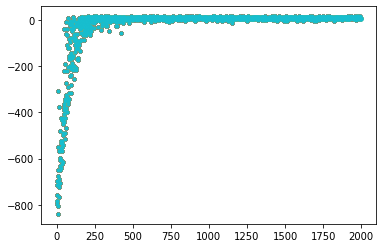

In [6]:
# Matrix für Q-Werte, Anzahl der Zustände (500) und Anzahl Aktionen (6), initial auf 0
Q1 = np.zeros((env.observation_space.n, env.action_space.n))

learn(2000)
execute(100)

## SARSA

Statt Q-Learning wird nun SARSA verwendet. Die Ergebnisse werden verglichen.


In [7]:
def get_action(state, epsilon):
    # Wähle die am besten bewertete Aktion mit Wahrscheinlichkeit 1-epsilon
    if random.uniform(0, 1) > epsilon:
        action = np.argmax(Q2[state, :])
    else:
        # Sonst führe eine zufällige Aktion aus
        action = env.action_space.sample()
    return action        
            
    
def learn(episodes):
    print ("Lernphase")
    
    # Epsilon für Exploration
    epsilon = 1
    
    # Lernparameter
    alpha = 0.2
    gamma = 1
    scores = [];
    
    
    # Lernen
    for episode in range(episodes):
        # Zurücksetzen der Umgebung vor jeder neuen Episode, Merken des Startzustandes
        state = env.reset()
        # Variablen initialisieren
        score = 0
        done = False
        action = get_action(state, epsilon)
        
        while(done == False):
                        
            # Führe die ausgewählte Aktion aus
            next_state, reward, done, _ = env.step(action)
            score += reward
            
            # Nächste Aktion aus dem nächsten Zustand errechnen, diese kann auch zufällig sein
            next_action = get_action(next_state, epsilon)
            
            # Aktualisierung der Q Werte, Index ist aktueller Status und die ausgeführte Aktion
            # SARSA Formel
            Q2[state, action] = (1 - alpha) * Q2[state, action] + alpha * (reward + gamma * Q2[next_state, next_action])
            
            # Neuen Zustand und nächste Aktion setzen
            state = next_state
            action = next_action
            
        scores.append(score)
        # Zeige die Bewertungen einer Episode graphisch über der Anzahl Episoden an
        plot.plot(scores, ".")
            
        # Ausgabe alle 1000 Episoden
        if(episode % 1000 == 0):
            print (f"Iteration: {episode}, Ergebnis: {score}")
            
        # Epsilon reduzieren falls es noch über einem Minimalwert liegt
        if (epsilon > 0.01):
            epsilon *= 0.98
            
plot.show()

In [8]:
def execute(cycles):
    print ("Ausführungsphase")    
    
    all_steps = 0
    scores = 0
    
    for cycle in range(cycles):
        
        # Zurücksetzen der Umgebung und Variablen initialisieren
        done = False
        state = env.reset()
        score = 0
        steps = 0
        
        if (cycle == 99):
            # Startzustand anzeigen (letzter Lauf)
            env.render()
    
        while(done == False):
            # Zähle Schritte bis zum Ziel hoch
            steps += 1
            # Wähle die am Besten bewertete Aktion aus
            action = np.argmax(Q2[state, :])
            # Führe die ausgewählte Aktion aus
            next_state, reward, done, _ = env.step(action)
            score += reward
            # Weitergehen
            state = next_state
        
            if (cycle == 99):
                # Zeige den aktuellen Zustand für den letzten Lauf
                env.render()
                
        all_steps += steps
        scores += score
                
        if (cycle == 99):
            print (f"Schritte: {steps}, Ergebnis: {score}")
        
    print ((f"Für {cycles} Zyklen: durchschnittliche Schritte zum Ziel {all_steps/cycles}, durchschnittliches Ergebnis: {scores/cycles}"))

Lernphase
Iteration: 0, Ergebnis: -740
Iteration: 1000, Ergebnis: 8
Ausführungsphase
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+----

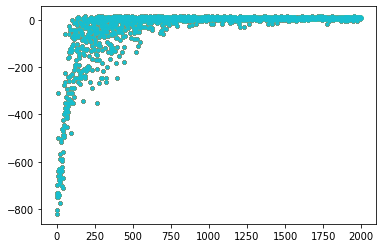

In [9]:
# Matrix für Q-Werte, Anzahl der Zustände (500) und Anzahl Aktionen (6), initial auf 0
Q2 = np.zeros((env.observation_space.n, env.action_space.n))

learn(2000)
execute(100)

-> SARSA liefert ein ähnliches (häufig besseres) Ergebnis bei niedrigerer Lernrate. Beim Lernvorgang scheint es mehr Ausreißer zu geben.